<a href="https://colab.research.google.com/github/Alejandro405/tfg/blob/main/cse_cic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Analizando y Describiendo el dataset

In [ ]:
!pip install colab_ssh --upgrade --quiet

## Carga y limpieza de los datos

In [ ]:
import os as os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


#from ydata_profiling import ProfileReport
#from ydata_profiling.config import Settings

import math
import matplotlib.pyplot as plt
import seaborn as sns

def freq_encoding(data):
    codificaciones = {}
    for cat_var in [idx for idx, dtype in data.dtypes.items() if dtype == 'object']:
        # Calcular la frecuencia de cada categoría
        frecuencias = data[cat_var].value_counts(normalize=True)

        # Guardar la codificación de frecuencia para esta variable
        codificaciones[cat_var] = frecuencias.to_dict()

        # Crear una nueva columna con la codificación de frecuencia y mantener la columna original
        nueva_columna = cat_var + '_frecuencia'
        data[nueva_columna] = data[cat_var].map(frecuencias)

        return data, codificaciones

In [ ]:
!pip install s3fs awscli
# !pip install pyspark
#!pip install ydata_profiling --quiet

In [ ]:
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv' ./
!aws s3 cp --no-sign-request 's3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv' ./

download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv to ./Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv to ./Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv to ./Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv to ./Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv to ./Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv to ./

In [ ]:
!cat Friday-02-03-2018_TrafficForML_CICFlowMeter.csv | head

Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Ac

In [ ]:
!du -h *.csv | awk '{print $1}'

337M
319M
366M
3.8G
103M
359M
365M
342M
314M
200M


In [ ]:
sizes = [
    344116,
    325908,
    373872,
    3959896,
    105316,
    367140,
    373676,
    349832,
    321192,
    204348
]

total = sum(sizes)/1000

6725.296

In [ ]:
# dataset_name = 'depured_cse_cic.csv'
dataset_name = 'EDAdepured_cse-cic.csv'

#raw_df = pd.read_csv(f'./drive/MyDrive/cse-cic/{dataset_name}', low_memory=True)
#df = raw_df.copy()
#/content/drive/MyDrive/cse-cic/cse-cic.csv
df = pd.read_csv(f'./drive/MyDrive/cse-cic/{dataset_name}', low_memory=True, memory_map=True)

for col in df.columns:
    df = df[~df[col].isin([col])]

df.reset_index(drop=True, inplace=True)
df.rename(columns={'Label':'Class'}, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

#df.to_csv(f'./drive/MyDrive/cse-cic/{dataset_name}', index=False)

In [ ]:
df.head()

,Dst Port,Bwd Seg Size Avg,Fwd Seg Size Avg,Pkt Size Avg,Down/Up Ratio,ECE Flag Cnt,CWE Flag Count,URG Flag Cnt,PSH Flag Cnt,RST Flag Cnt,...,Bwd IAT Mean,Bwd IAT Tot,Fwd IAT Min,Fwd IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Tot,Bwd IAT Std,Class_encoded,Class
0,62227,0.000,0.000000,0.000000,0,0,0,0,0,0,...,0.0,0.0,32.0,32.0,0.000000,32.000000,32.0,0.000000e+00,0.830103,Benign
1,53,86.000,45.000000,88.000000,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.830103,Benign
2,3389,216.375,102.857143,144.136364,0,1,0,0,1,1,...,550440.0,3853080.0,65.0,1243227.0,345306.694975,302277.230769,3929604.0,3.688760e+05,0.830103,Benign
3,80,57.750,24.250000,41.000000,1,0,0,0,1,0,...,1961434.0,5884302.0,113.0,61618.0,35476.489403,20653.333333,61960.0,3.396818e+06,0.830103,Benign
4,54235,0.000,0.000000,0.000000,0,0,0,1,0,0,...,0.0,0.0,45454.0,45454.0,0.000000,45454.000000,45454.0,0.000000e+00,0.830103,Benign


In [ ]:
sampled_df = df.groupby('Class').apply(lambda x: x.sample(frac=.25))

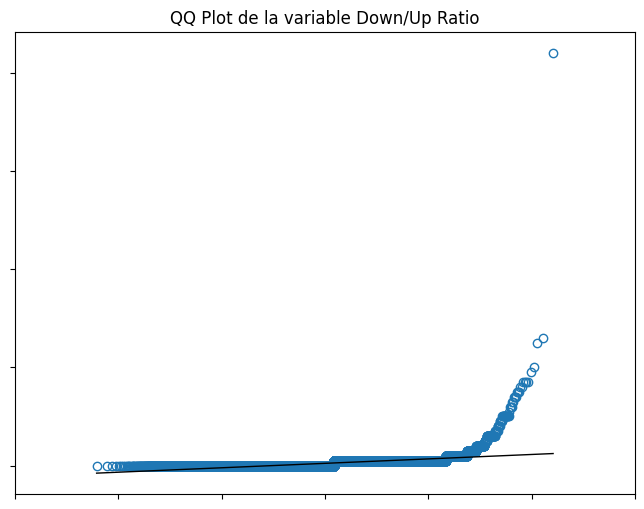

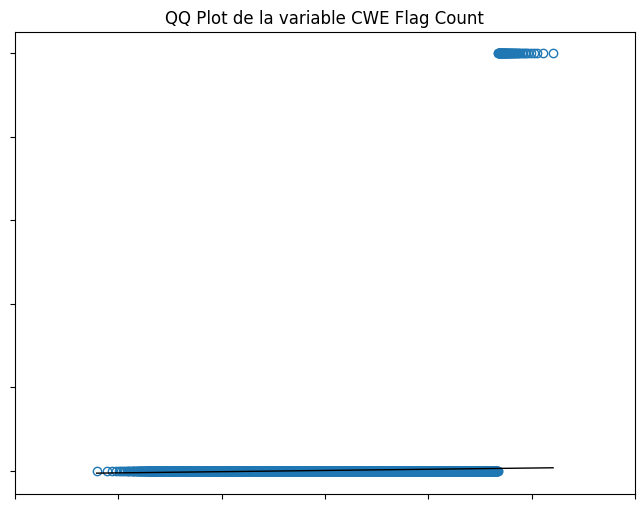

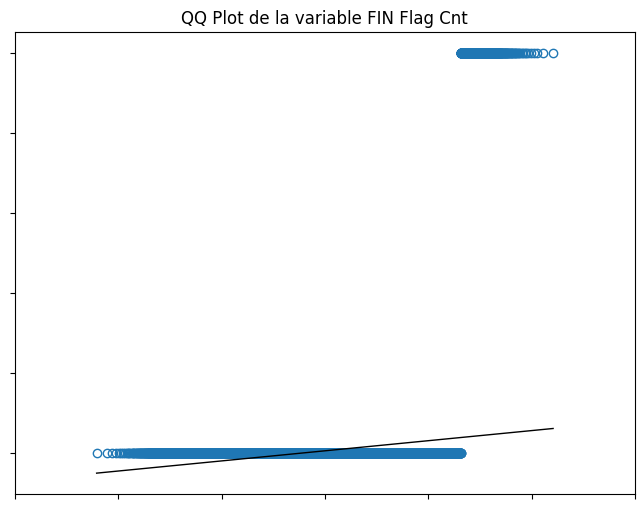

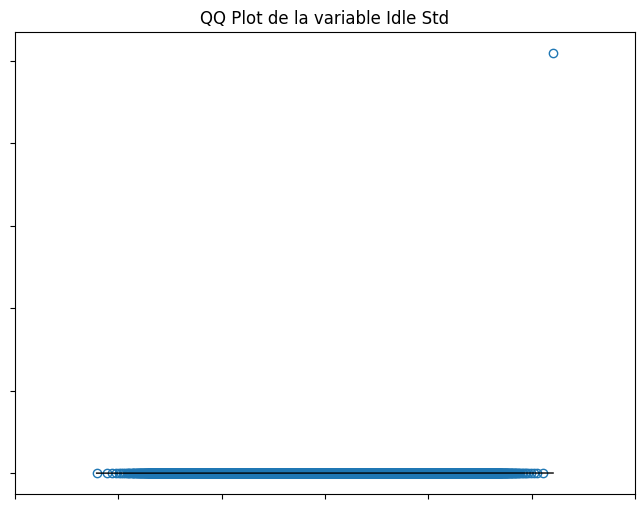

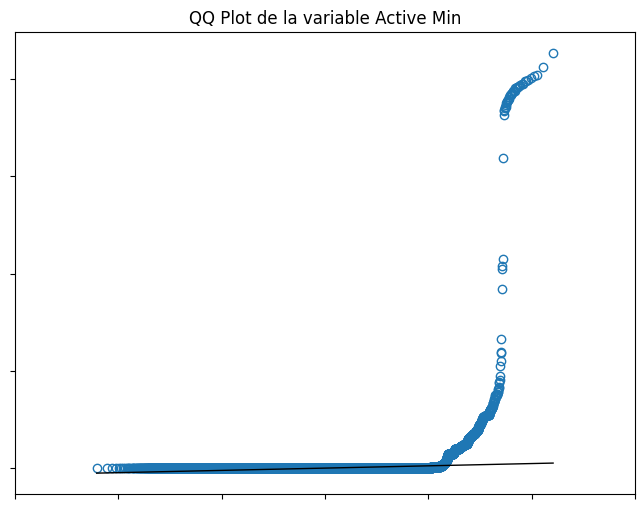

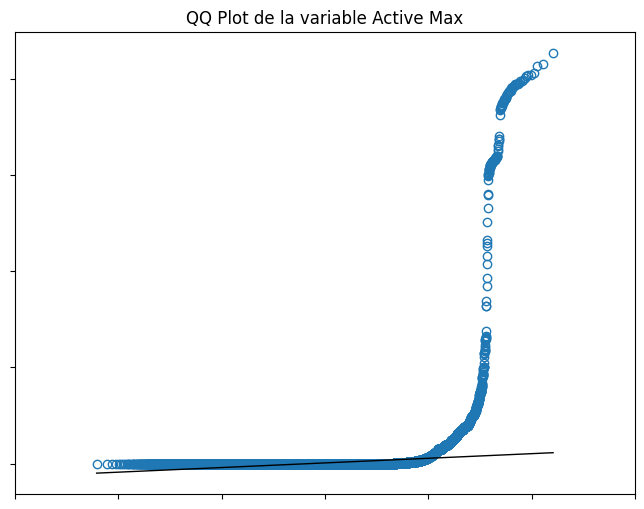

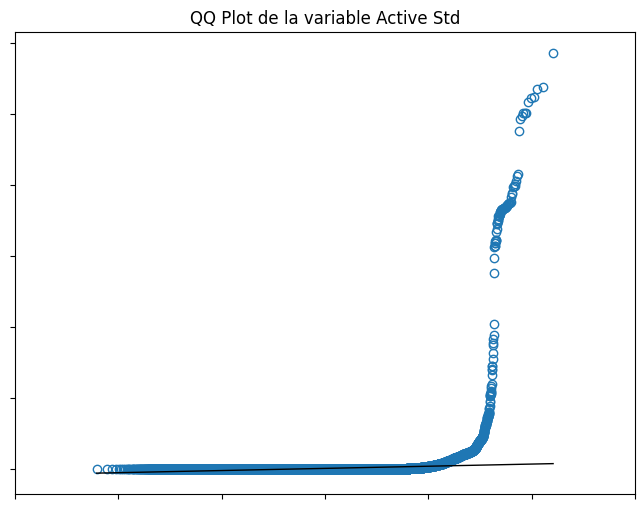

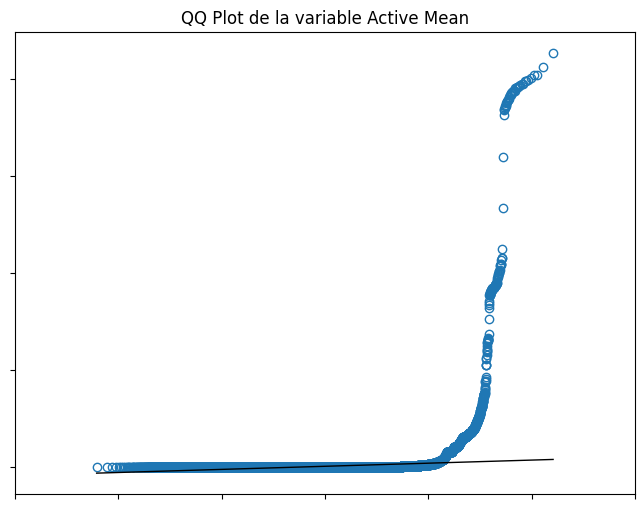

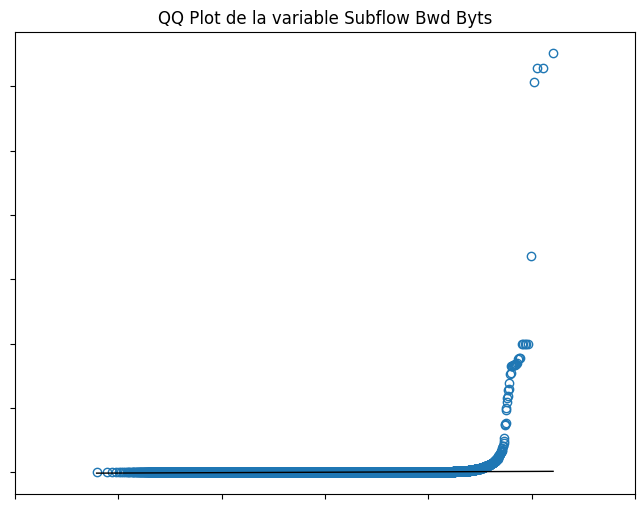

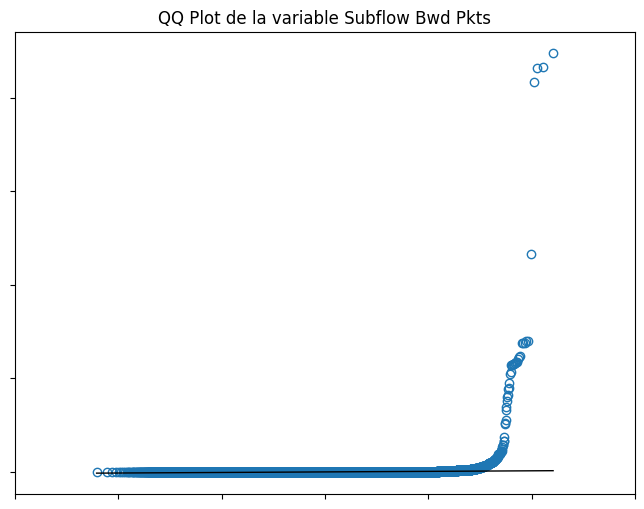

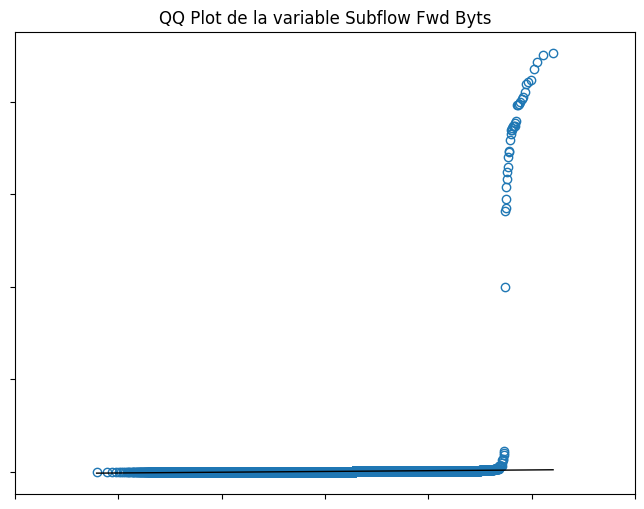

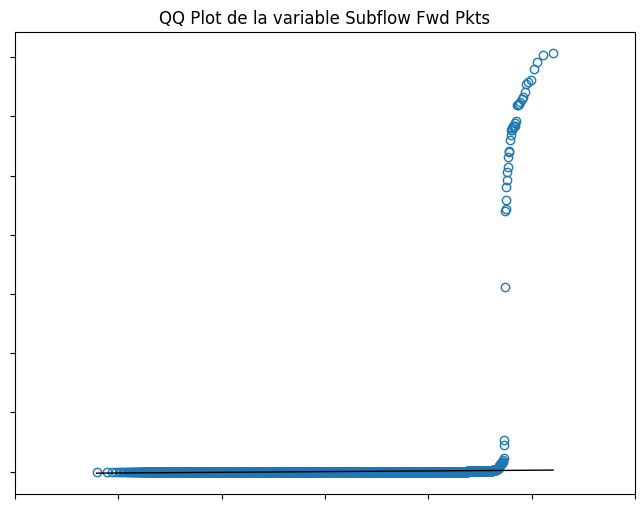

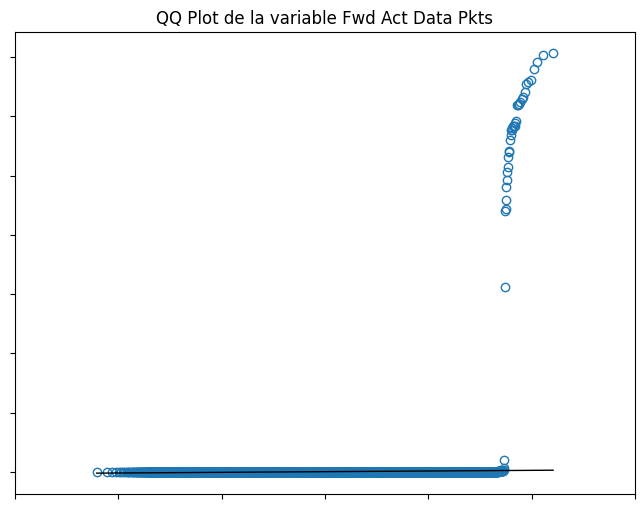

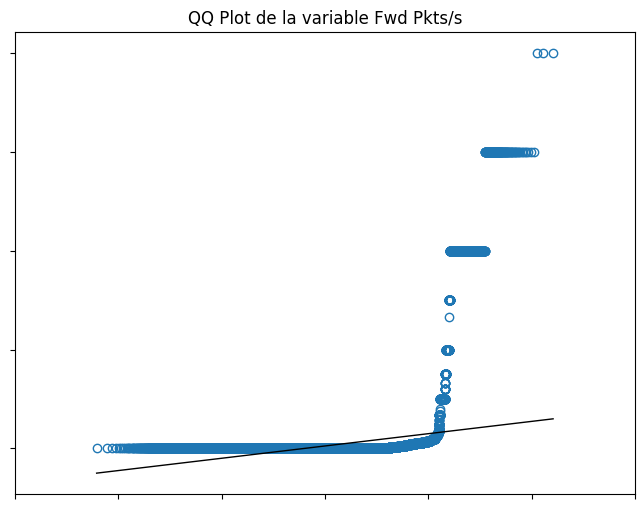

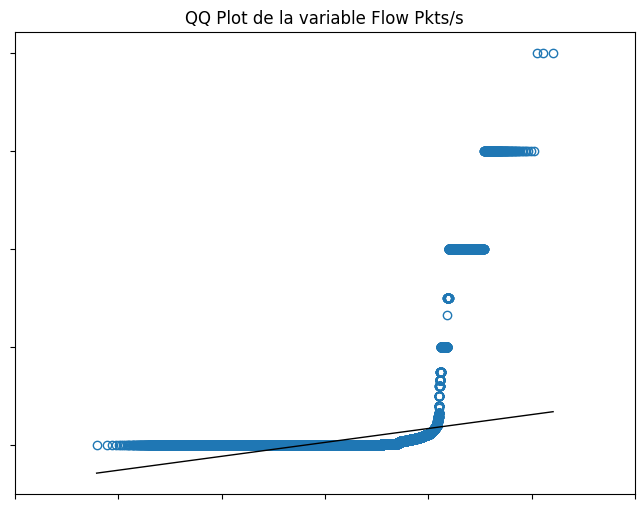

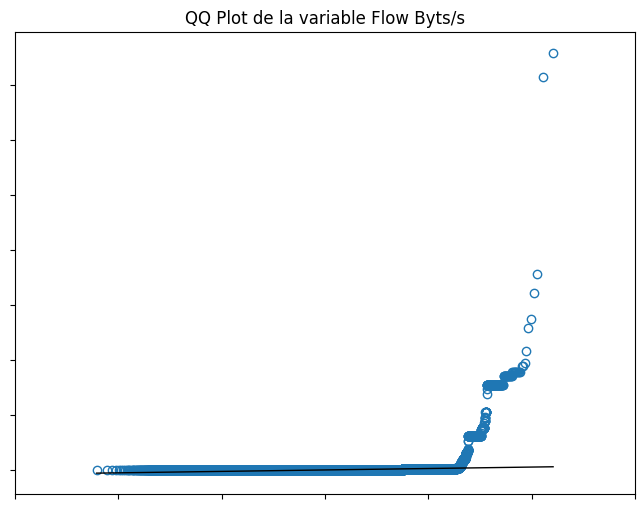

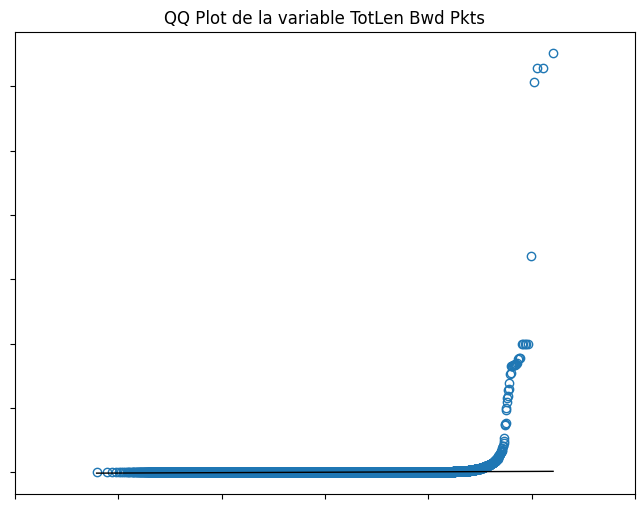

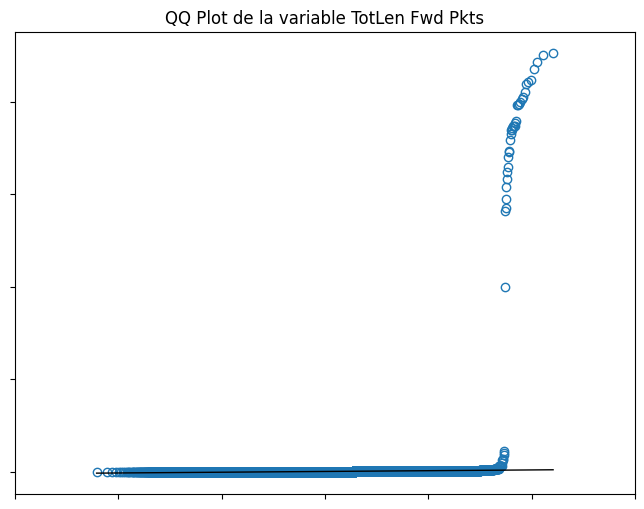

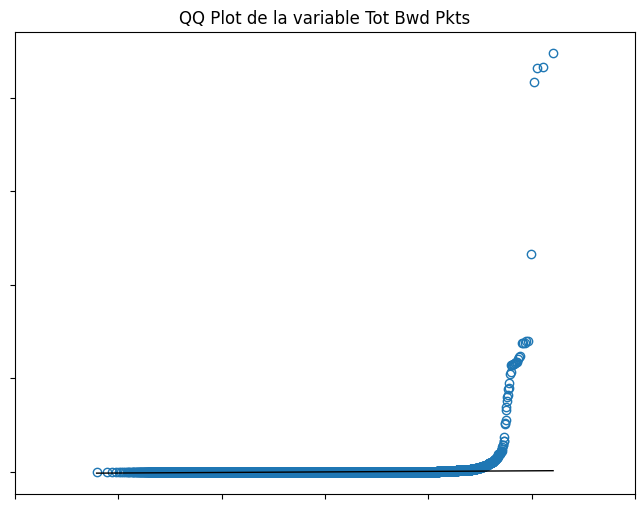

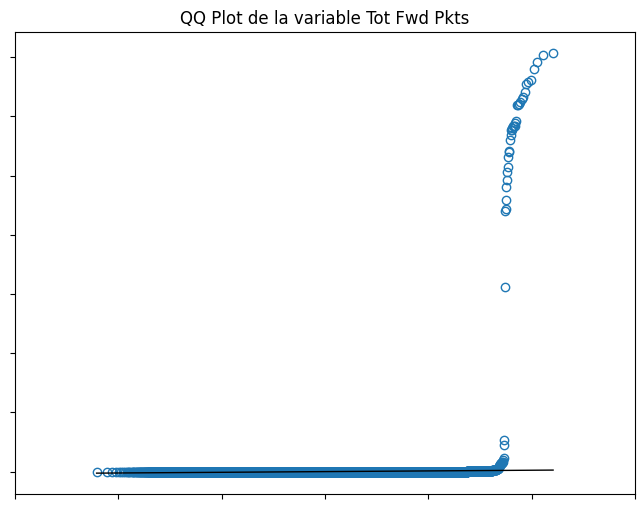

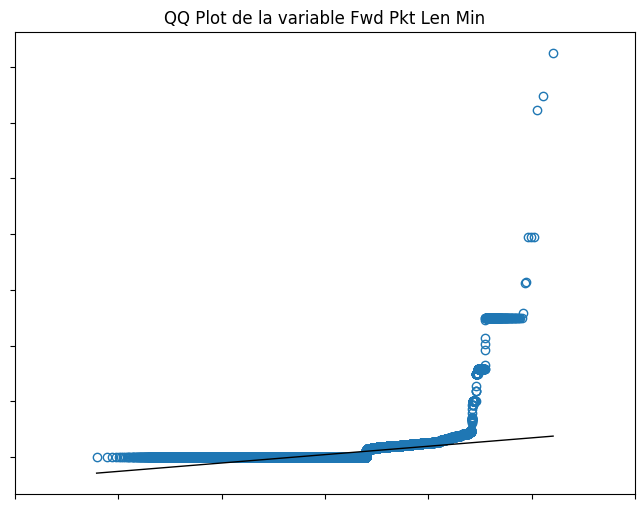

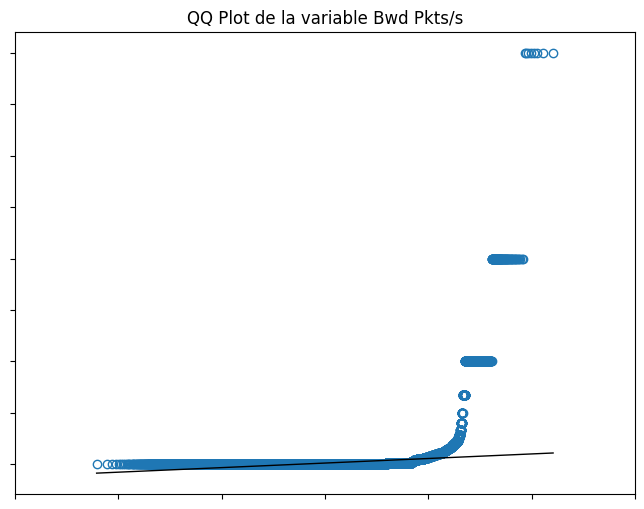

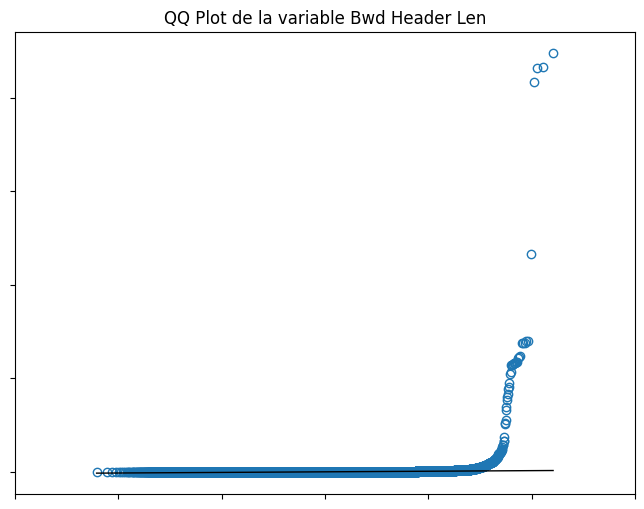

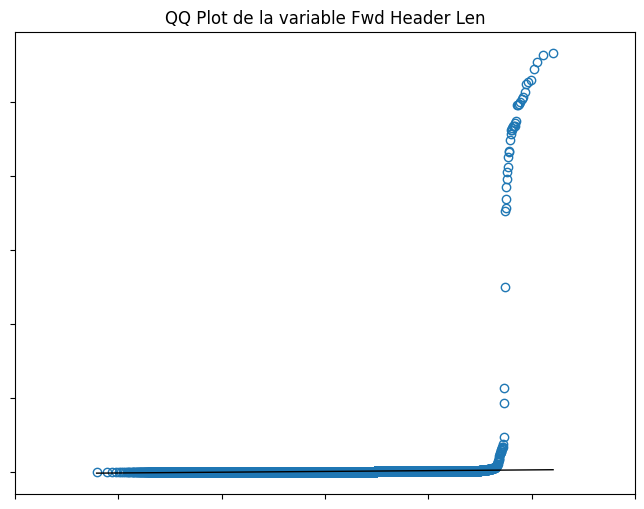

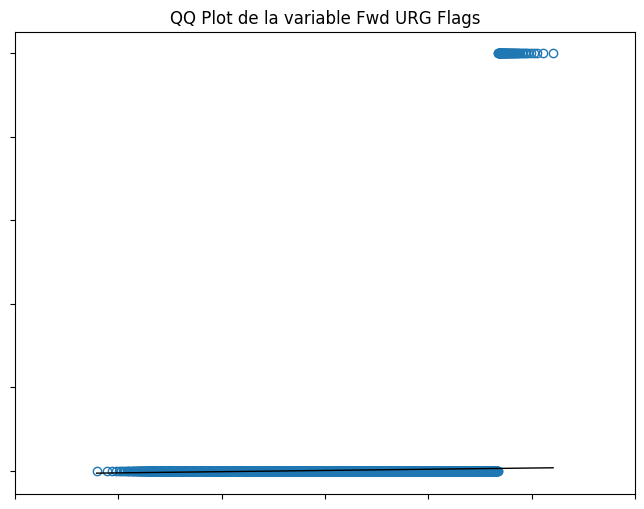

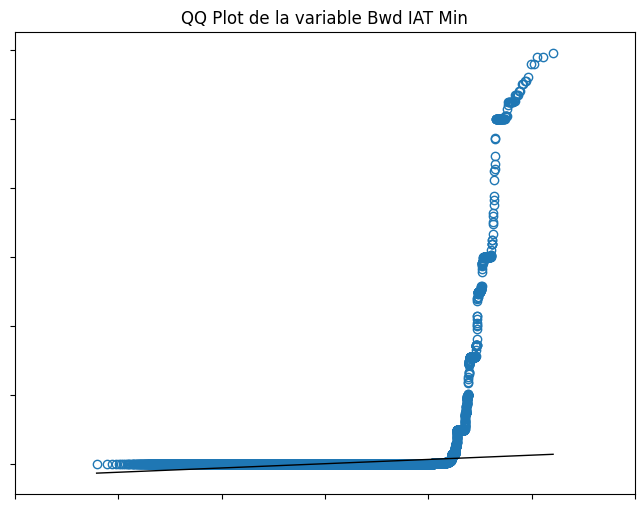

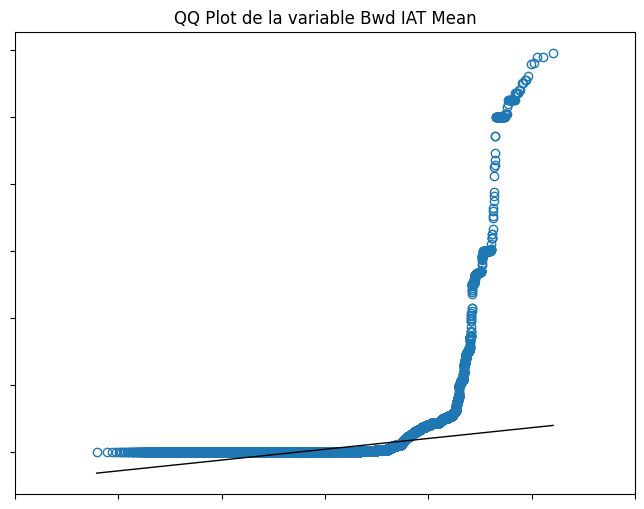

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

for var in sesgadas:
    plt.figure(figsize=(8, 6))
    (osm, osr), (slope, intercept, r) = stats.probplot(sampled_df[var], dist="norm")
    plt.plot(osm, osr, 'o', markerfacecolor='none', markeredgecolor='#1f77b4')
    plt.plot(osm, slope*osm + intercept, color='black', lw=1)
    plt.title('QQ Plot de la variable ' + var)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
    plt.grid(False)

    plt.xlim([-6, 6])  # Set x-axis limits
    # Save the figure before calling plt.show()
    plt.savefig(f'{var.replace("/", "_")}_qqplot.png', dpi=300, bbox_inches='tight')

    plt.show()

In [ ]:
!zip  qqplots_csecic.zip *.png

In [ ]:
cfg = Settings()
cfg.infer_dtypes = False
cfg.correlations["auto"].calculate = True
cfg.correlations["pearson"].calculate = False
cfg.correlations["spearman"].calculate = False  # No calcular correlaciones de Spearman
cfg.correlations["kendall"].calculate = False  # No calcular correlaciones de Kendall
cfg.correlations["phi_k"].calculate = False  # No calcular coeficiente de correlación phi_k
cfg.correlations["cramers"].calculate = False  # No calcular coeficiente de correlación Cramers
cfg.interactions.continuous = False
cfg.missing_diagrams["bar"] = True
cfg.missing_diagrams["heatmap"] = True  # Mantener heatmap para visualizar valores perdidos
cfg.missing_diagrams["matrix"] = True
cfg.samples.tail = 0
cfg.samples.random = 0

profile = ProfileReport(
    df.groupby('Class').apply(lambda x: x.sample(frac=.2)).rename(columns={'Class':'Label'}),
    title='CSE CIC IDS 2018 - EDA',
    config=cfg
)

#a.to_file("EDA.html")

In [ ]:
profile.to_file("EDA_CSE.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

constant_columns= [
    'Fwd Byts/b Avg' ,
    'Fwd Pkts/b Avg' ,
    'Fwd Blk Rate Avg',
    'Bwd Pkts/b Avg' ,
    'Bwd Byts/b Avg' ,
    'Bwd Blk Rate Avg',
    'Bwd URG Flags',
    'Bwd PSH Flags']

duplicated = [67, 69, 66, 64, 84, 83, 65, 85, 2058, 2056]

In [ ]:
profile.description_set.alerts

In [ ]:
# Ver las variables con alertas por ceros
zero_vars = []
skewed_vars = []

# Iterar sobre las variables en el reporte
for variable in profile.description_set.variables:
    prop = profile.description_set.variables.get(variable)
    # Verificar si la variable tiene la clave 'p_zeros'
    if 'p_zeros' in prop and prop['p_zeros'] > 0.9:
        zero_vars.append({variable: prop['p_zeros']})
    if 'skewness' in prop and prop['skewness'] >= 10:
        skewed_vars.append({variable:prop['skewness']})


import json

aux = {
    "sesgadas" : skewed_vars,
    "zero_vars" : zero_vars
}

dst_file = './drive/MyDrive/cse-cic/results/var_report.json'
with open(dst_file, 'w') as file:
  json.dump(aux, file)

In [ ]:
import json

df_dtypes = None
with open('./drive/MyDrive/cse-cic/dtypes.json') as types:
  df_dtypes = json.load(types)

df = df[~df.apply(lambda row: any(row[i] == row.index[i] for i in range(len(row))), axis=1)]

for column in df.columns:
  df[column].astype(df_dtypes.get(column))

df.dropna(inplace=True)

In [ ]:
df.drop(columns=constant_columns, inplace=True)
df.drop_duplicates(keep='first', subset=df.columns, inplace=True)

In [ ]:
sampled_df.head()

,Dst Port,Bwd Seg Size Avg,Fwd Seg Size Avg,Pkt Size Avg,Down/Up Ratio,ECE Flag Cnt,CWE Flag Count,URG Flag Cnt,PSH Flag Cnt,RST Flag Cnt,...,Bwd IAT Tot,Fwd IAT Min,Fwd IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Tot,Bwd IAT Std,Class_encoded,Class,Class_frecuencia
0,62227,0.000,0.000000,0.000000,0,0,0,0,0,0,...,0.0,32.0,32.0,0.000000,32.000000,32.0,0.000000e+00,0.830103,Benign,0.830103
1,53,86.000,45.000000,88.000000,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.830103,Benign,0.830103
2,3389,216.375,102.857143,144.136364,0,1,0,0,1,1,...,3853080.0,65.0,1243227.0,345306.694975,302277.230769,3929604.0,3.688760e+05,0.830103,Benign,0.830103
3,80,57.750,24.250000,41.000000,1,0,0,0,1,0,...,5884302.0,113.0,61618.0,35476.489403,20653.333333,61960.0,3.396818e+06,0.830103,Benign,0.830103
4,54235,0.000,0.000000,0.000000,0,0,0,1,0,0,...,0.0,45454.0,45454.0,0.000000,45454.000000,45454.0,0.000000e+00,0.830103,Benign,0.830103


In [ ]:
# Calcular la matriz de correlación
sampled_df, _ = freq_encoding(df.copy())
matriz_correlacion = sampled_df.corr()

# Seleccionar las variables con una correlación alta con la variable objetivo (por ejemplo, > 0.5 o < -0.5)
correlacion_objetivo = matriz_correlacion["Class_encoded"].abs() > 0.5
variables_interesantes_objetivo = matriz_correlacion.columns[correlacion_objetivo].tolist()

# Seleccionar las variables con una correlación alta entre sí
correlacion_entre_variables = (matriz_correlacion.abs() > 0.5) & (matriz_correlacion.abs() < 1.0)
variables_interesantes_entre_variables = []
for columna in correlacion_entre_variables:
    variables_correlacionadas = matriz_correlacion.index[correlacion_entre_variables[columna]].tolist()
    variables_interesantes_entre_variables.extend(variables_correlacionadas)

variables_interesantes_entre_variables = list(set(variables_interesantes_entre_variables))

# Combinar las variables seleccionadas
variables_interesantes = variables_interesantes_entre_variables

# Eliminar la variable objetivo si está presente en las variables seleccionadas
if "Label" in variables_interesantes:
    variables_interesantes.remove("Label")

<ipython-input-24-cbde33e49667>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = sampled_df.corr()


In [ ]:
aux = {
    'variables_interesantes_objetivo': variables_interesantes_objetivo,
    'variables_correladas_sii': variables_interesantes
}
with open('./drive/MyDrive/cse-cic/elim_corr.json', 'w') as out:
  json.dump(aux, out)

In [ ]:
sorted_freq = sorted(list(df['Class'].unique()), reverse=True)
asdf = pd.read_csv('./drive/MyDrive/cse-cic/cse-cic.csv', low_memory=True, memory_map=True)

conteo = asdf['Label'].value_counts().to_dict()
sorted_cont = dict(sorted(conteo.items(), key=lambda item: item[1], reverse=True))

encoded_freq = dict(zip(sorted_freq, sorted_cont.keys()))

df['Class_decoded'] = df['Class'].map(encoded_freq)

In [ ]:
df.to_csv(f'./drive/MyDrive/cse-cic/{dataset_name}',index=False, header=True, na_rep='', encoding='utf-8')

In [ ]:
memory_usage = df.memory_usage(deep=True, index=False)

# Crea un DataFrame con los nombres de las columnas y su consumo de memoria
memory_df = pd.DataFrame({'column_name': df.columns, 'memory_usage': memory_usage}).sort_values(by='memory_usage')

# Elimina las filas duplicadas, manteniendo la primera ocurrencia (que es la que consume menos memoria debido a la ordenación)
memory_df = memory_df.drop_duplicates(subset='column_name', keep='first')

df = df[memory_df['column_name']]

## Estudio descriptivo de los datos

In [ ]:
df_corr = df.corr()

<ipython-input-48-673bd41f6603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


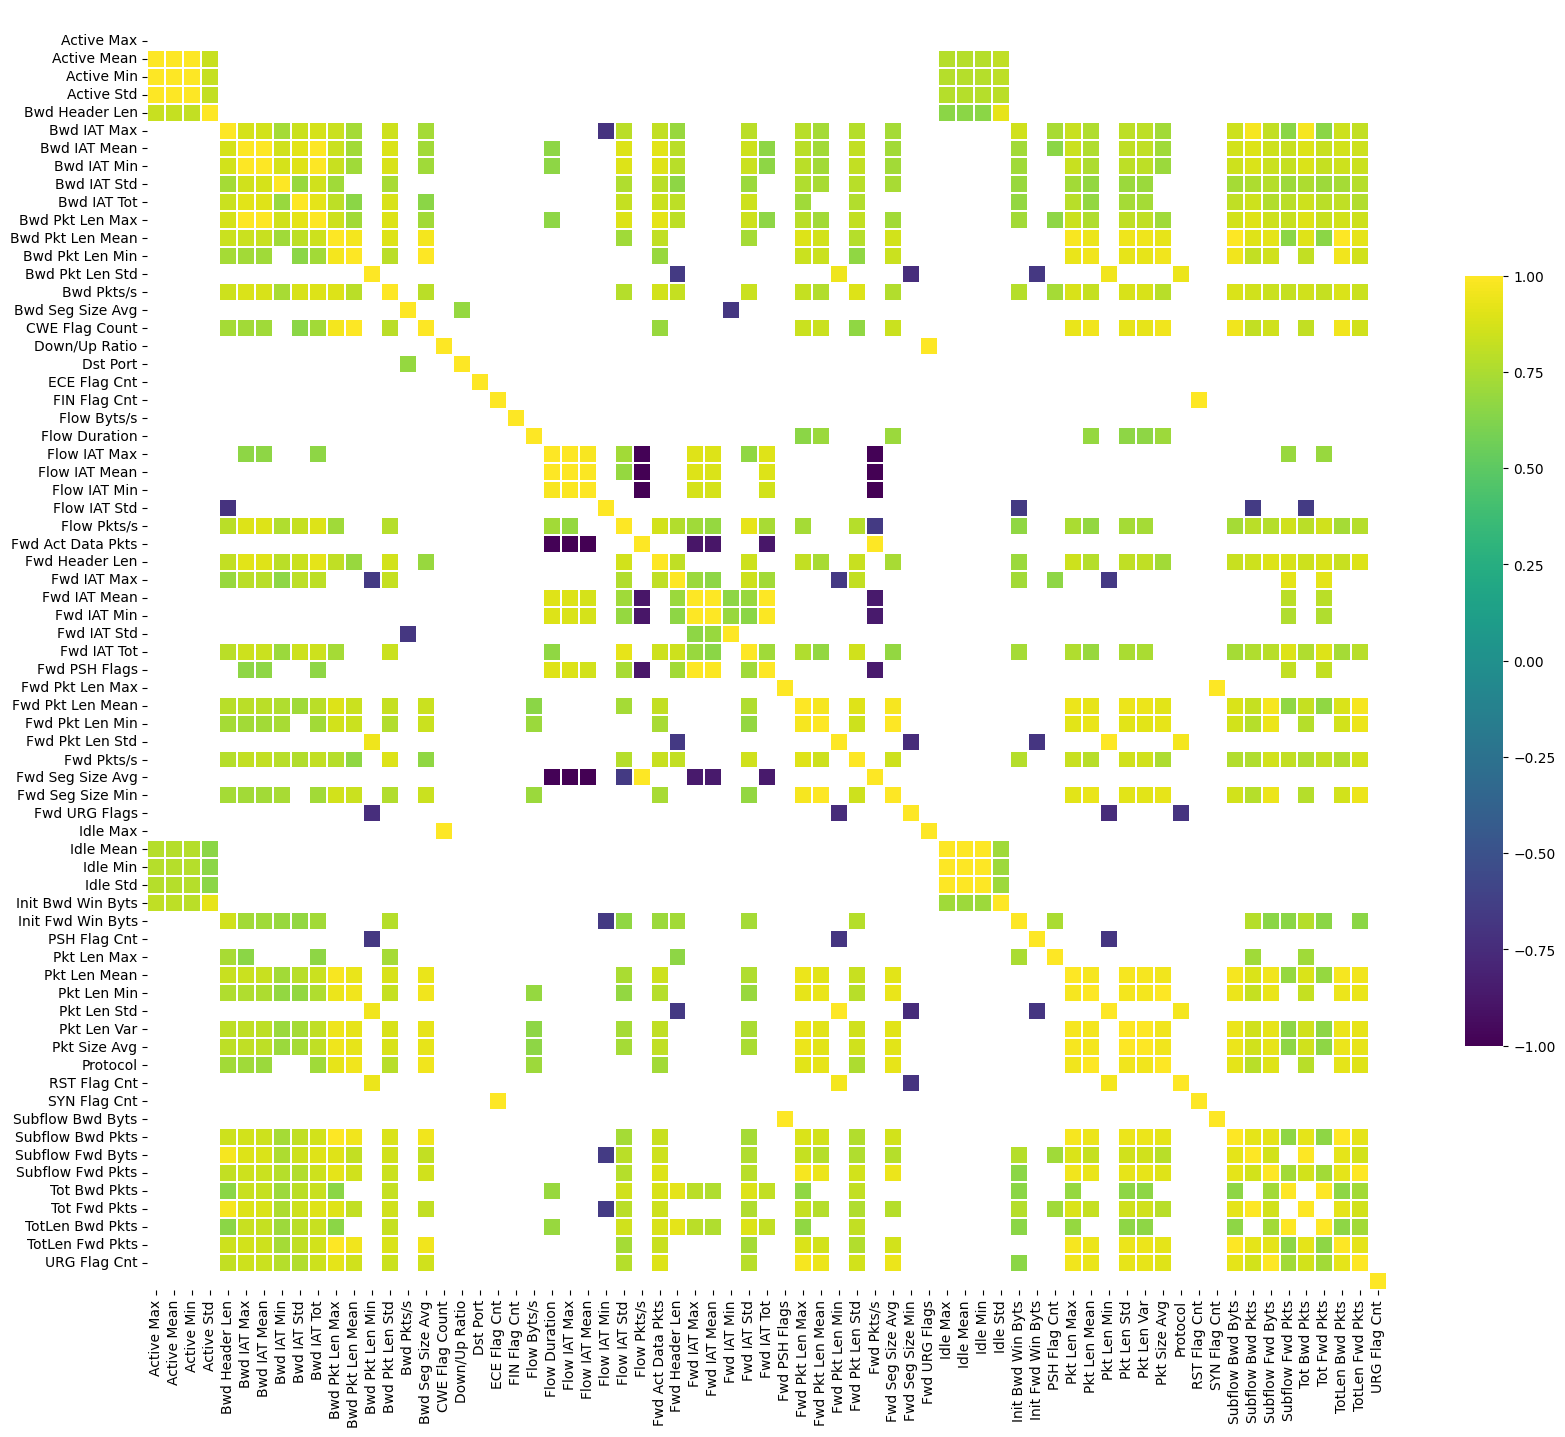

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

matriz_correlacion = pd.read_csv('/content/drive/MyDrive/cse-cic/results/corr_matrix.csv', index_col=0)

plt.figure(figsize=(20, 20))

# Generar el heatmap
sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.65) | (matriz_correlacion <= -0.65)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=False, square=True, cbar_kws={'shrink': .5},
            xticklabels=matriz_correlacion.columns, yticklabels=matriz_correlacion.columns)

# Aumentar el tamaño de la fuente de las etiquetas de los ejes
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('')
plt.ylabel('')

# Título del gráfico
plt.title('  ')

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtén la lista de todas las columnas numéricas en tu DataFrame
numerical_columns = df.columns

# Calcula el número de filas necesarias para acomodar todas las columnas en tres columnas
num_rows = math.ceil(len(numerical_columns) / 3)

# Crea una figura y una cuadrícula de subtramas con el número de filas calculado y tres columnas
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

# Aplanar la lista de ejes
axs = axs.ravel()

# Itera sobre cada subtrama y cada columna en tu DataFrame
for i, col in enumerate(numerical_columns):
    if i < len(numerical_columns) - 1:
      sns.distplot(df[col], color='g', bins=100, hist_kws={'alpha': 0.4})

# Guarda la figura
plt.savefig('./out/histograms/all_histograms.png')

# Muestra la figura
plt.show()

In [ ]:
df.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: ylabel='Pkt Len Max'>

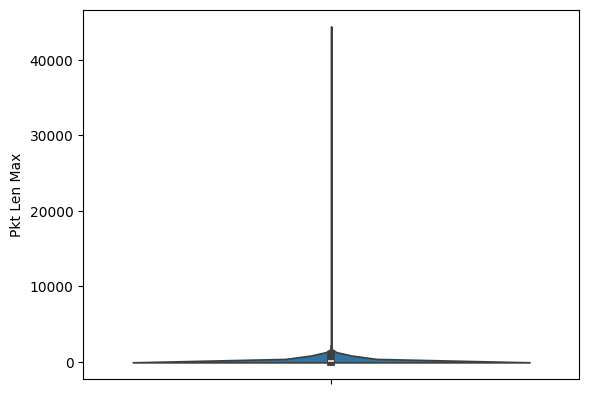

In [ ]:
sns.violinplot(df['Pkt Len Max'])

## Reducción de variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

sampled_df = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.5))

enc = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

categ = [idx for idx, dtype in df.dtypes.items() if dtype == 'object']
numer = [idx for idx, dtype in df.dtypes.items() if dtype != 'object']

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

X = df.drop('Class', axis=1)
y = df['Class']

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")


In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
feature_ranking = list(zip(X.columns, refcv.ranking_))

# Ordena las características por su ranking
sorted_features = sorted(feature_ranking, key=lambda x: x[1])

# Extrae solo las características con un ranking de 1
best_features = [feature for feature, rank in sorted_features if rank == 1]

print(best_features)



In [ ]:
import shelve

filename='/tmp/shelve.out'
my_shelf = shelve.open(filename,'n') # 'n' for new

for key in dir():
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

In [ ]:
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

In [ ]:
!cp ./drive/MyDrive/cse-cic/cse-cic_sampled .

## Clearing Datset

In [ ]:
import json
import pandas as pd

var_report = {}
with open('./drive/MyDrive/cse-cic/results/var_report.json', 'r') as file:
  var_report = json.load(file)

pca_vars = {}
with open('./drive/MyDrive/cse-cic/results/pca_vars.json', 'r') as file:
  pca_vars = json.load(file)

kBest = {}
with open('./drive/MyDrive/cse-cic/results/kBest.json', 'r') as file:
  kBest = json.load(file)

elim_corr = {}
with open('./drive/MyDrive/cse-cic/results/eliminacion_correlacion.json', 'r') as file:
  elim_corr = json.load(file)


df = pd.read_csv(f'./drive/MyDrive/cse-cic/cse-cic.csv', low_memory=True, memory_map=True)

In [ ]:
!du -ah ./drive/MyDrive/cse-cic/*.csv

250M	./drive/MyDrive/cse-cic/cleared_cse-cic_sampled.csv
476M	./drive/MyDrive/cse-cic/cse-cic.csv
242M	./drive/MyDrive/cse-cic/cse-cic_sampled.csv
245M	./drive/MyDrive/cse-cic/depured_cse_cic.csv
211M	./drive/MyDrive/cse-cic/EDAdepured_cse-cic.csv
245M	./drive/MyDrive/cse-cic/final_cse-cic.csv
225M	./drive/MyDrive/cse-cic/variables.csv


Eliminacion de las variables sesgadas y con un alto número de ceros:

In [ ]:
sesgadas = [key for d in var_report.get('sesgadas') for key in d.keys()]

ceros = [key for d in var_report.get('zero_vars') for key in d.keys()]


eliminar = set(sesgadas) & set(ceros)
print(eliminar)

{'Active Std', 'Active Max', 'FIN Flag Cnt', 'Active Mean', 'CWE Flag Count', 'Fwd URG Flags', 'Active Min', 'Idle Std'}


In [ ]:
df.drop(columns=eliminar, inplace=True)

In [ ]:
kB_vars = set(kBest.get('filtered'))
top_vars = kB_vars & set(pca_vars.get('selección'))
len(top_vars)

23

In [ ]:
correladas = elim_corr.get('candidatos_eliminar')
len(top_vars - set(correladas))

3

Para este dataset asumiremos el riesgo de la multicolinealidad, dado que lo contrario solo podríamos disponer de tres variables y la perdida de informacion sería demasiado grande

In [ ]:
X = df[top_vars]
y = df['Label']

<ipython-input-10-288a8ddf970c>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[top_vars]


In [ ]:
final_df = pd.concat([X, y], axis=1)

final_df.to_csv(f'./drive/MyDrive/cse-cic/results/depured_cse-cic.csv',index=False, header=True, na_rep='', encoding='utf-8')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.25,
    random_state=42,
    stratify=y
)

pd.concat([X_train, y_train], axis=1).to_csv(f'./drive/MyDrive/cse-cic/results/{dataset_name}_train.csv',index=False, header=True, na_rep='', encoding='utf-8')
pd.concat([X_test, y_test], axis=1).to_csv(f'./drive/MyDrive/cse-cic/results/{dataset_name}_test.csv',index=False, header=True, na_rep='', encoding='utf-8')

# DecTree UNSW-NB15

In [ ]:
import os
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

import seaborn as sns

def target_encode(df, cat_columns, target_column, alpha=1):
    # Verificar si las columnas categóricas están presentes en el DataFrame
    missing_columns = [col for col in cat_columns if col not in df.columns]
    if missing_columns:
        print(f"Advertencia: Las siguientes columnas categóricas están ausentes en el DataFrame: {', '.join(missing_columns)}")
        cat_columns = [col for col in cat_columns if col not in missing_columns]

    # Realizar codificación manual en la columna objetivo si no es numérica
    if not np.issubdtype(df[target_column].dtype, np.number):
        target_encoded = df[target_column].map({'anomaly': 1, 'normal': 0})
    else:
        target_encoded = df[target_column]

    for col in cat_columns:
        freq = df[col].value_counts(normalize=True)
        try:
            mean_target = df.groupby(col).apply(lambda group: target_encoded[group.index].mean())
            sample_size = df.shape[0]

            encoded_values = (freq * mean_target + alpha) / (freq + alpha * sample_size)
            encoding_map = dict(zip(encoded_values.index, encoded_values.values))

            df[col] = df[col].map(encoding_map)
        except Exception as e:
            print(f"Advertencia: No se pudo codificar la columna '{col}' debido al error: {str(e)}")

    return df

dataset_name = 'unsw-nb15'

raw_df = pd.read_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}.csv')
df = raw_df.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=.4))

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

cat_cols = raw_df.drop('Label', axis=1).select_dtypes(include=['object'])

In [ ]:
one_hot_encoded = pd.get_dummies(df['srcip'], drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(['srcip'], axis=1, inplace=True)

In [ ]:
df = target_encode(df, ['proto', 'state'], 'Label')
#df = target_encode(df, ['service'], 'Label')

In [ ]:
scaler = StandardScaler()

df_scaled_features = scaler.fit_transform(df.drop('Label', axis=1))
df[df.drop('Label', axis=1).columns] = df_scaled_features

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    stratify=y,
)



In [ ]:
from sklearn.metrics import f1_score, make_scorer

f1_weighted = make_scorer(f1_score, average='weighted')

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, len(X_train.columns), 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el clasificador de árbol de decisión
clf = DecisionTreeClassifier(
    class_weight='balanced'
)

# Inicializar GridSearchCV con validación cruzada de 5 pliegues
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=1000,
    cv=3,
    n_jobs=-1,
    scoring=f1_weighted,
    return_train_score=True,
    verbose=5
)

# Ajustar GridSearchCV a los datos de entrenamiento
random_search.fit(X_train, y_train)
results_df = pd.DataFrame(random_search.cv_results_)
results_df

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 72 is smaller than n_iter=1000. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.317690,0.306940,0.230714,0.002513,2,1,1,gini,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.984276,0.984553,0.984469,0.984432,0.000116,55,0.984511,0.984372,0.984414,0.984432,0.000058
1,1.793957,0.073761,0.231559,0.010775,5,1,1,gini,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.984276,0.984553,0.984469,0.984432,0.000116,55,0.984511,0.984372,0.984414,0.984432,0.000058
2,2.194410,0.329778,0.253280,0.034397,10,1,1,gini,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.984276,0.984553,0.984469,0.984432,0.000116,55,0.984511,0.984372,0.984414,0.984432,0.000058
3,2.118328,0.247051,0.269199,0.060050,2,2,1,gini,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.984276,0.984553,0.984469,0.984432,0.000116,55,0.984511,0.984372,0.984414,0.984432,0.000058
4,1.806209,0.051388,0.228420,0.002504,5,2,1,gini,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.984276,0.984553,0.984469,0.984432,0.000116,55,0.984511,0.984372,0.984414,0.984432,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.071980,0.475373,0.227846,0.008925,5,2,16,entropy,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.988616,0.988715,0.988757,0.988696,0.000059,11,0.989378,0.989393,0.989394,0.989389,0.000007
68,3.892303,0.193641,0.314413,0.064050,10,2,16,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.988599,0.988734,0.988738,0.988691,0.000065,16,0.989312,0.989315,0.989324,0.989317,0.000005
69,2.944212,0.493259,0.231657,0.009082,2,4,16,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.988573,0.988717,0.988793,0.988694,0.000091,12,0.989169,0.989195,0.989303,0.989223,0.000058
70,3.578160,0.360352,0.318746,0.123295,5,4,16,entropy,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.988576,0.988703,0.988804,0.988694,0.000093,13,0.989171,0.989203,0.989314,0.989229,0.000061


In [ ]:
results_df.to_csv(f'./drive/MyDrive/{dataset_name}/results/DecTree/hyperparameters_results.csv', header=True, index=False)

# Hyperparameters

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import uniform

def target_encode(df, cat_columns, target_column, alpha=1):
    # Verificar si las columnas categóricas están presentes en el DataFrame
    missing_columns = [col for col in cat_columns if col not in df.columns]
    if missing_columns:
        print(f"Advertencia: Las siguientes columnas categóricas están ausentes en el DataFrame: {', '.join(missing_columns)}")
        cat_columns = [col for col in cat_columns if col not in missing_columns]

    # Realizar codificación manual en la columna objetivo si no es numérica
    if not np.issubdtype(df[target_column].dtype, np.number):
        target_encoded = df[target_column].map({'anomaly': 1, 'normal': 0})
    else:
        target_encoded = df[target_column]

    for col in cat_columns:
        freq = df[col].value_counts(normalize=True)
        try:
            mean_target = df.groupby(col).apply(lambda group: target_encoded[group.index].mean())
            sample_size = df.shape[0]

            encoded_values = (freq * mean_target + alpha) / (freq + alpha * sample_size)
            encoding_map = dict(zip(encoded_values.index, encoded_values.values))

            df[col] = df[col].map(encoding_map)
        except Exception as e:
            print(f"Advertencia: No se pudo codificar la columna '{col}' debido al error: {str(e)}")

    return df

dataset_name = 'cse-cic'

#raw_df = pd.read_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}.csv')
raw_df = pd.read_csv(f'./drive/MyDrive/{dataset_name}/results/.csv')

cat_cols = raw_df.drop('Label', axis=1).select_dtypes(include=['object'])
#cat_cols = raw_df.drop('Class', axis=1).select_dtypes(include=['object'])

df = raw_df.copy()
#df = raw_df.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=.15))
#df = raw_df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=.75))
#df.drop(columns=['Class_encoded'], inplace=True)
#df.rename(columns={'Class':'Label'}, inplace=True)

KeyError: "['Label'] not found in axis"

In [ ]:
!ls

sample_data


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler() # para NSL KDD

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df_scaled_features = scaler.fit_transform(df.drop('Label', axis=1))
df[df.drop('Label', axis=1).columns] = df_scaled_features

In [ ]:
rbf_grid_search = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': [],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]
}

nonlinear_grid_search = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4, 5]
}

linear_grid_search = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear']
}

complete_grid  = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  # Relevant for 'poly', 'rbf', and 'sigmoid'
    'degree': [2, 3, 4, 5],  # Relevant for 'poly'
    'coef0': [0, 0.1, 0.5, 1, 2],  # Relevant for 'poly' and 'sigmoid'
}

In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.33,
    stratify=y,
)

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Para cse-cic
#X_train_resampled, y_train_resampled = X_train, y_train

In [ ]:
svm_classifier = SVC(
    kernel='poly',
    gamma='scale',
    class_weight='balanced',
    cache_size=2000,
    random_state=42
)

svm_classifier.fit(X_train_resampled, y_train_resampled)

SVC(cache_size=2000, class_weight='balanced', kernel='poly', random_state=42)

In [ ]:
from sklearn.metrics import make_scorer, f1_score


svm_classifier = SVC(
    class_weight='balanced',
    verbose=False,
    max_iter=10000,
    tol=0.0001,
    cache_size=2000,
    random_state=42
)

f1_weighted = make_scorer(f1_score, average='weighted')

# Inicializar RandomizedSearchCV para búsqueda de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=svm_classifier,
    param_distributions=complete_grid,
    n_iter=100,
    #n_iter=n_combinations,  # Número de combinaciones de parámetros a probar
    cv=5,  # Reducir el número de validaciones cruzadas
    n_jobs=-1,
    scoring=f1_weighted,
    return_train_score=True,
    verbose=3
)

# Realizar la búsqueda de hiperparámetros en el conjunto de datos submuestreado
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=SVC(cache_size=2000, class_weight='balanced',
                                 max_iter=10000, random_state=42, tol=0.0001),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'coef0': [0, 0.1, 0.5, 1, 2],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', 0.01, 0.1, 1,
                                                  10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   return_train_score=True,
                   scoring=make_scorer(f1_score, average=weighted), verbose=3)

In [ ]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.to_csv(f'./drive/MyDrive/{dataset_name}/results/svm/hyperparameters_non_linear_results.csv', header=True, index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cse-cic/results/svm/hyperparameters_kernels_results.csv')

<Axes: >

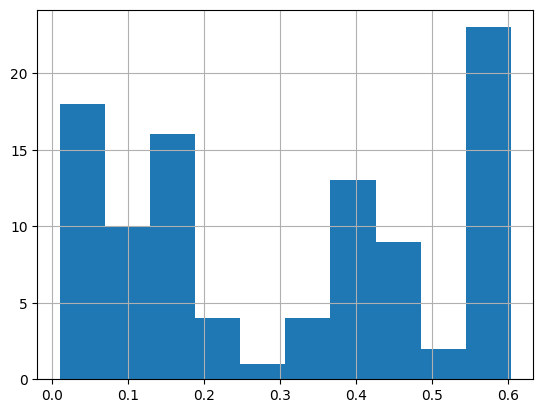

In [ ]:
results_df['mean_test_score'].hist()

In [ ]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.014300,0.006738,0.011966,0.005833,poly,auto,4,10,"{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.379327,0.425717,0.402522,0.023195,53,0.606433,0.582981,0.594707,0.011726
1,0.016781,0.006557,0.009160,0.003414,poly,10,2,1,"{'kernel': 'poly', 'gamma': 10, 'degree': 2, '...",0.516417,0.593085,0.554751,0.038334,12,0.914258,0.900281,0.907269,0.006989
2,0.017810,0.003768,0.011663,0.000687,poly,0.1,4,0.01,"{'kernel': 'poly', 'gamma': 0.1, 'degree': 4, ...",0.225781,0.271992,0.248887,0.023105,66,0.398818,0.352648,0.375733,0.023085
3,0.018635,0.000055,0.006103,0.000075,poly,0.1,3,1,"{'kernel': 'poly', 'gamma': 0.1, 'degree': 3, ...",0.311549,0.329878,0.320714,0.009165,58,0.457981,0.409864,0.433922,0.024058
4,0.014720,0.006878,0.024830,0.004455,rbf,0.1,4,0.1,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, '...",0.253806,0.116634,0.185220,0.068586,93,0.378407,0.260600,0.319503,0.058904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.017025,0.000485,0.018398,0.002202,poly,scale,2,1,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.200388,0.260721,0.230555,0.030166,76,0.310552,0.323948,0.317250,0.006698
96,0.015411,0.003243,0.023468,0.008103,poly,0.1,4,10,"{'kernel': 'poly', 'gamma': 0.1, 'degree': 4, ...",0.379327,0.396544,0.387935,0.008608,54,0.621550,0.598665,0.610108,0.011443
97,0.025756,0.005983,0.024831,0.008630,poly,0.01,2,0.01,"{'kernel': 'poly', 'gamma': 0.01, 'degree': 2,...",0.200388,0.215369,0.207879,0.007490,78,0.310552,0.323948,0.317250,0.006698
98,0.030303,0.003842,0.012981,0.001055,poly,10,5,100,"{'kernel': 'poly', 'gamma': 10, 'degree': 5, '...",0.571642,0.540216,0.555929,0.015713,10,0.907648,0.947671,0.927660,0.020012


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datset_name = 'nsl-kdd'
scores = pd.read_csv(f'/content/drive/MyDrive/{datset_name}/results/RandomForest/hyperparameters_results.csv')

scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       30 non-null     float64
 1   std_fit_time        30 non-null     float64
 2   mean_score_time     30 non-null     float64
 3   std_score_time      30 non-null     float64
 4   param_n_estimators  30 non-null     int64  
 5   param_max_depth     30 non-null     int64  
 6   param_criterion     30 non-null     object 
 7   params              30 non-null     object 
 8   split0_test_score   30 non-null     float64
 9   split1_test_score   30 non-null     float64
 10  mean_test_score     30 non-null     float64
 11  std_test_score      30 non-null     float64
 12  rank_test_score     30 non-null     int64  
 13  split0_train_score  30 non-null     float64
 14  split1_train_score  30 non-null     float64
 15  mean_train_score    30 non-null     float64
 16  std_train_

In [ ]:
scores = results_df.copy()

<ipython-input-46-4b7bc337b526>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'param_{hypar}', y='mean_test_score', data=scores, palette='viridis')


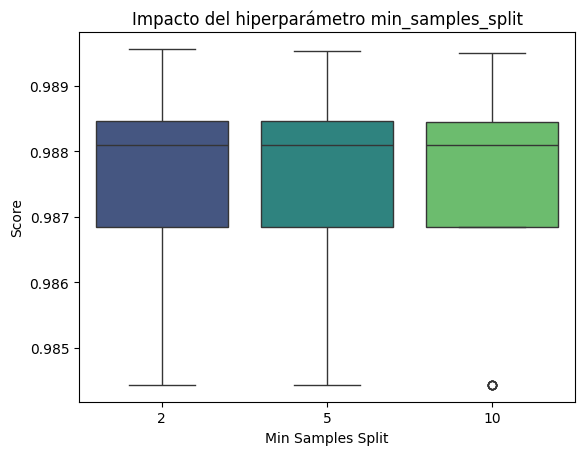

<ipython-input-46-4b7bc337b526>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'param_{hypar}', y='mean_test_score', data=scores, palette='viridis')


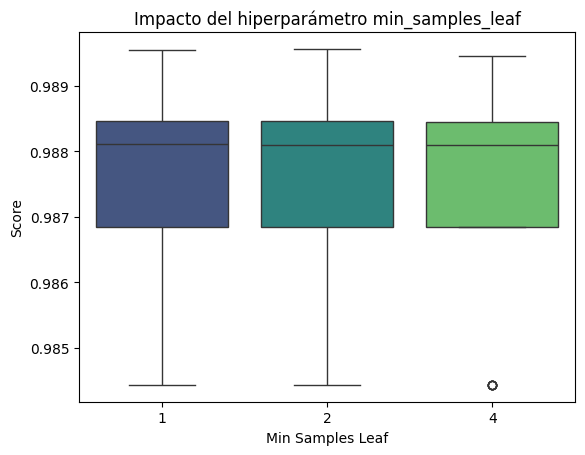

<ipython-input-46-4b7bc337b526>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'param_{hypar}', y='mean_test_score', data=scores, palette='viridis')


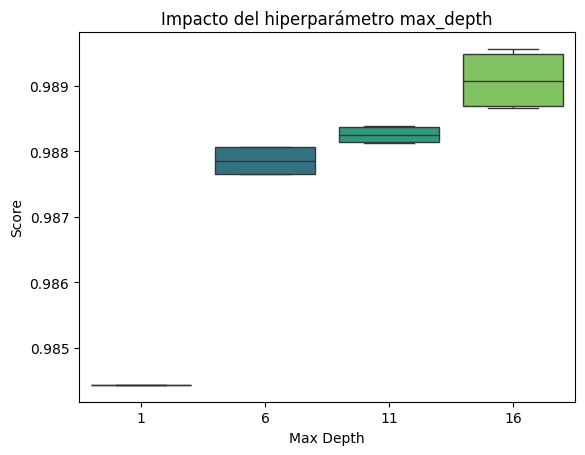

<ipython-input-46-4b7bc337b526>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'param_{hypar}', y='mean_test_score', data=scores, palette='viridis')


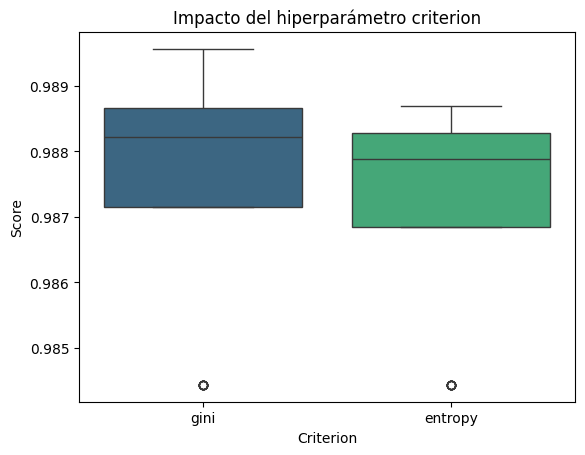

In [ ]:
# filtrar de la lista columns aquellas etiquetas con el preficjo param_
params = [col.replace('param_', '') for col in scores.columns if col.startswith('param_')]

for hypar in params:
  sns.boxplot(x=f'param_{hypar}', y='mean_test_score', data=scores, palette='viridis')
  plt.title(f'Impacto del hiperparámetro {hypar}')

  # Renombrar las etiquetas de los ejes: sustituir las _ por espacios en blanco y capitalizar texto
  plt.xlabel(hypar.replace('_', ' ').title())
  plt.ylabel('Score')
  plt.show()

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            54 non-null     float64
 1   std_fit_time             54 non-null     float64
 2   mean_score_time          54 non-null     float64
 3   std_score_time           54 non-null     float64
 4   param_min_samples_split  54 non-null     int64  
 5   param_min_samples_leaf   54 non-null     int64  
 6   param_max_depth          54 non-null     int64  
 7   param_criterion          54 non-null     object 
 8   params                   54 non-null     object 
 9   split0_test_score        54 non-null     float64
 10  split1_test_score        54 non-null     float64
 11  split2_test_score        54 non-null     float64
 12  mean_test_score          54 non-null     float64
 13  std_test_score           54 non-null     float64
 14  rank_test_score          54 